RAIN - Real & Artificial Intelligence for Neuroscience

## Prepare positions

Welcome!

This is the first oficial notebook of the Rainstorm project. Here you'll find the initial steps to prepare your data for analysis.

The position data obtained with pose estimation software is usually stored in HDF files (those ending in '.h5'), that will be our starting point.

- This notebook will take HDF files of mouse tracking data (obtained for example with DeepLabCut or SLEAP) and prepare the position files to be analyzed.
- It filters out low likelihood positions, interpolates and smoothens the data.
- The positions can also be scaled from pixels to centimeters for better generalization.

#### Requirements:
- A folder with HDF files containing:
    - The position of the mouse bodyparts on the video.
    - The position of the **exploration targets** (Optional, but recommended, since they can be added manually later).

If you dont have your position files with you, don't worry! You can demo the pipeline by working on the example data provided in the downloaded repository. It contains:
- A **Novel Object Recognition** (NOR) task, with positions from each **mouse bodyparts and two objects** analized using **DeepLabCut**.
- A **Social Preference** (SP) task, containing the position for each **mouse bodyparts**, analized using **SLEAP**. Locations of the **exploration targets** are added using points selected with the  Draw_ROIs notebook.


---
#### Load the necessary modules

In [121]:
import os
from glob import glob
import rainstorm.prepare_positions as rst

---
#### 1. State your project path
`base` : The path to the downloaded repository. If you are using a Windows path with backslashes, place an ‘r’ in front of the directory path to avoid an error (e.g. r'C:\Users\dhers\Rainstorm').

`folder_path` : The path to the folder containing the pose estimation files you want to use.

`ROIs_path` : The path to the json file that was generated using the Draw_ROIs.ipynb notebook.

In [122]:
# State your path:
base = r'C:\Users\dhers\Desktop\Rainstorm' # For the downloaded repository
folder_path = os.path.join(base, r'docs\examples\NOR_example') # For the folder containing the pose estimation files you want to use

folder_path = r'C:\Users\dhers\Desktop\Rainstorm\docs\examples\Y_Maze'
ROIs_path = os.path.join(folder_path, 'ROIs.json') # For the ROIs.json file (optional)

---
#### 2. Rename the files to end in '_position.h5'
To ease the analysis, we should start by editing the filenames. We are looking for the following:
- Position files must end with the word '_position'.
- Since we use the data from different softwares, filenames end with something like '{DLC or SLEAP}_{Network_used + name + date + snapshot}.h5'.
- (Optional) If the files belong to different trials of an experiment, they should contain the name of the trial in the filename.

We can find an easy way to rename files below.

In [123]:
# Lets first make a copy of the example position_files (so that we have a backup in case things go south)
rst.backup_folder(folder_path)

The folder 'C:\Users\dhers\Desktop\Rainstorm\docs\examples\Y_Maze_backup' already exists.


In [124]:
# Change the file name as needed

before =  'bla.h5' 
# 'DLC_resnet50_shuffle2_200000.h5'for the NOR_example 
# 'DLC_Resnet50_rainstormFeb17shuffle4_snapshot_200.h5' # for the SP example
after = '_position.h5'

rst.rename_files(folder_path, before, after)

#### 3.  Create the params.yaml file

the params.yaml file is a configuration file that contains all the parameters needed to run the analysis. It is located in the experiment folder. It contains the following parameters:

`path` : Path to the experiment folder containing the pose estimation files.

`filenames` : List of the pose estimation filenames.

`software` : State the software used to generate the tracking files ('DLC' or 'SLEAP').

`bodyparts` : List the tracked bodyparts.

`targets` : List the exploratory targets.

`trials` : If your experiment has multiple trials, specify the trial names here.

`filtering & smoothing` : Parameters for processing positions:
- confidence : State how many std_dev away from the mean the points can be without being erased (it is similar to asking "how good is your tracking?").
- tolerance : If the mean likelihood is below this value, the whole point will be erased (because it is probably not there).
- median_filter : State how many frames to use for the median filter. It must be an odd number.

`scaling` : Measure the distance between two bodyparts to scale the video from pixels to cm.
- measured_points : State the two points that will be used to measure the distance between them.
- measured_dist : State the distance between the measured points. Distance between the ears is 1.8 cm in my c57 mice.

`video_fps` : State the frames per second of the videos.

`roi_data` : Information about the ROIs. It is a dictionary with the following keys:
- frame_shape: Shape of the video frames.
- areas: Defined ROIs (areas) in the frame.
- points: Key points within the frame.

`geometric analysis` : Parameters for defining exploration and freezing behavior:
- distance : State the maximum nose-object distance to consider exploration.
- angle : State the maximum head-object orientation angle to consider exploration.
- freezing_threshold : State the movement threshold for freezing, computed as mean std of all body parts over 1 second.

In [125]:
# Create the YAML file
params = rst.create_params(folder_path, ROIs_path)

params.yaml already exists in C:\Users\dhers\Desktop\Rainstorm\docs\examples\Y_Maze. Skipping creation.


---
#### 3. Open an example file and see what is inside

In [126]:
# Choose a random example file to plot:
all_h5_files = glob(os.path.join(folder_path,"*position.h5"))
example_path = rst.choose_example(all_h5_files, look_for = 'TS') # You can use the 'look_for' variable to specify the file you want to use (e.g. 'TS_C1_A').

No files found with the specified word
Plotting coordinates from 2025_03-Y_Maze-R16_C6i_position.h5


In [127]:
# Open the example file:
df_raw = rst.open_h5_file(params, example_path, print_data=True)

Positions obtained by: DLC_Resnet50_rainstormFeb17shuffle4_snapshot_200
Points in df: ['body', 'head', 'left_ear', 'left_hip', 'left_midside', 'left_shoulder', 'neck', 'nose', 'right_ear', 'right_hip', 'right_midside', 'right_shoulder', 'tail_base', 'tail_end', 'tail_mid']
Frame count: 13975
body 	 median: 0.95 	 mean: 0.94 	 std_dev: 0.06 	 tolerance: 0.81
head 	 median: 0.89 	 mean: 0.87 	 std_dev: 0.11 	 tolerance: 0.64
left_ear 	 median: 0.86 	 mean: 0.84 	 std_dev: 0.11 	 tolerance: 0.62
left_hip 	 median: 0.91 	 mean: 0.89 	 std_dev: 0.10 	 tolerance: 0.68
left_midside 	 median: 0.90 	 mean: 0.88 	 std_dev: 0.10 	 tolerance: 0.67
left_shoulder 	 median: 0.87 	 mean: 0.85 	 std_dev: 0.10 	 tolerance: 0.65
neck 	 median: 0.88 	 mean: 0.86 	 std_dev: 0.09 	 tolerance: 0.69
nose 	 median: 0.83 	 mean: 0.81 	 std_dev: 0.12 	 tolerance: 0.58
right_ear 	 median: 0.88 	 mean: 0.87 	 std_dev: 0.10 	 tolerance: 0.67
right_hip 	 median: 0.89 	 mean: 0.87 	 std_dev: 0.10 	 tolerance: 0.68
ri

Notice that, if the model is working properly, the mean likelihood of an existing point is very close to 1. However, some points have lower mean likelihoods and higher standard deviations. This is because those points are harder to find (e.g. the nose tends to disappear during grooming). We will adjust our tolerance for each point, and erase only the positions that are below it.

---
#### 4. Add the position of stationary exploration targets to the DataFrame
As we talked about in the introduction, the position of the exploration targets can be tracked using the same software we use to track our animals, or not.

If our pose estimation model do not track the exploration targets, we can add them to the DataFrame using the following `add_targets` function.

The `add_targets` function will use the points selected using the Draw_ROIs tool, all we need to do is to add the ROIs and the points name to the `targets` list in the params.yaml file.

In [128]:
df_raw = rst.add_targets(params, df_raw)

---
#### 5. Now that we have our file, lets test our processing parameters in an example video

In [129]:
df_smooth = rst.filter_and_smooth_df(params, df_raw)

rst.plot_raw_vs_smooth(params, df_raw, df_smooth, bodypart='nose')

---
#### 6. Measure ROI activity.


In [130]:
import yaml
import pandas as pd
import numpy as np

def load_yaml(params_path: str) -> dict:
    """Loads a YAML file."""
    with open(params_path, "r") as file:
        return yaml.safe_load(file)

def is_point_in_rotated_rectangle(x, y, center, width, height, angle):
    """Check if a point (x, y) is inside a rotated rectangle."""
    angle = np.radians(angle)
    cos_a, sin_a = np.cos(angle), np.sin(angle)

    # Translate point relative to the rectangle center
    x_rel, y_rel = x - center[0], y - center[1]

    # Rotate the point in the opposite direction
    x_rot = x_rel * cos_a + y_rel * sin_a
    y_rot = -x_rel * sin_a + y_rel * cos_a

    # Check if the point falls within the unrotated rectangle's bounds
    return (-width / 2 <= x_rot <= width / 2) and (-height / 2 <= y_rot <= height / 2)


def assign_areas(params_path, df):
    params = load_yaml(params_path)
    bodyparts = ['body']
    roi_data = params.get("roi_data", {})
    areas = roi_data.get("areas", [])
    
        # Create a new DataFrame for results
    area_df = pd.DataFrame(index=df.index)

    for bp in bodyparts:
        area_col = []
        for i, row in df.iterrows():
            x, y = row[f"{bp}_x"], row[f"{bp}_y"]
            assigned_area = "None"
            for area in areas:
                if is_point_in_rotated_rectangle(x, y, area["center"], area["width"], area["height"], area["angle"]):
                    assigned_area = area["name"]
                    break
            area_col.append(assigned_area)
        
        area_df[bp] = area_col  # Assign the area to the corresponding body part column
    
    return area_df

In [131]:
areas_df= assign_areas(params, df_smooth)

In [132]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

def plot_bodypart_positions(params_path, df, areas_df, bodypart="body"):
    """
    Plots individual body part positions, colored according to their assigned area.

    Parameters:
    - params_path: Path to the YAML file with ROI information.
    - df: DataFrame containing body part positions.
    - area_df: DataFrame containing area classifications for each body part.
    - bodypart: The body part to analyze (default: "body").
    """
    params = load_yaml(params_path)
    roi_data = params.get("roi_data", {})
    frame_shape = roi_data.get("frame_shape", {})
    areas = roi_data.get("areas", [])

    frame_width = frame_shape["width"]
    frame_height = frame_shape["height"]

    # Extract x and y positions
    x_vals = df[f"{bodypart}_x"].values
    y_vals = df[f"{bodypart}_y"].values
    labels = areas_df[bodypart].values  # Assigned area labels

    # Define a color map for the different areas
    unique_areas = [area["name"] for area in areas] + ["None"]
    colors = plt.cm.get_cmap("tab10", len(unique_areas))  # Different colors per area
    area_colors = {area: colors(i) for i, area in enumerate(unique_areas)}

    # Create figure
    fig, ax = plt.subplots(figsize=(frame_width / 100, frame_height / 100))  
    ax.set_xlim(0, frame_width)
    ax.set_ylim(0, frame_height)
    ax.invert_yaxis()  # Match video coordinates
    ax.set_title(f"Scatter plot of {bodypart} positions")

    # Scatter plot with colors based on assigned area
    for area_name in unique_areas:
        mask = labels == area_name
        ax.scatter(x_vals[mask], y_vals[mask], label=area_name, color=area_colors[area_name], alpha=0.6, s=10)

    # Plot ROIs
    for area in areas:
        center_x, center_y = area["center"]
        width, height = area["width"], area["height"]
        angle = area["angle"]

        # Create rotated rectangle
        rect = patches.Rectangle(
            (center_x - width / 2, center_y - height / 2), width, height,
            angle=angle, rotation_point="center", edgecolor="black", facecolor="none", lw=2
        )
        ax.add_patch(rect)
        ax.text(center_x, center_y, area["name"], fontsize=10, color="black",
                ha="center", va="center", bbox=dict(facecolor="white", alpha=0.6, edgecolor="none"))

    ax.legend(title="Assigned Area")
    plt.show()


C:\Users\dhers\AppData\Local\Temp\ipykernel_15124\1642051302.py:30: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



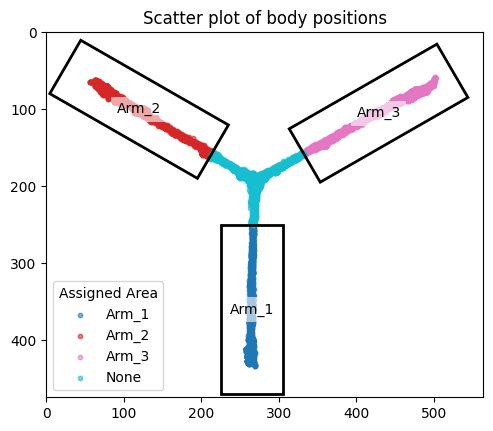

In [133]:
plot_bodypart_positions(params, df_smooth, areas_df)

In [134]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

def plot_bodypart_heatmap(params_path, df, bins=50, cmap="Reds", alpha=0.6):
    """
    Plots a heatmap of body part positions overlaid with ROIs.

    Parameters:
    - df: DataFrame containing body part positions.
    - bodypart: The body part to analyze (e.g., "nose").
    - roi_data: Dictionary containing ROI information from params.yaml.
    - bins: Number of bins for the heatmap (default: 50).
    - cmap: Colormap for the heatmap (default: "Reds").
    - alpha: Transparency level for the heatmap (default: 0.6).
    """
    params = load_yaml(params_path)
    bodypart = 'body'
    roi_data = params.get("roi_data", {})
    frame_shape = roi_data.get("frame_shape", {})
    areas = roi_data.get("areas", [])

    frame_width = frame_shape["width"]
    frame_height = frame_shape["height"]

    # Extract x and y positions of the body part
    x_vals = df[f"{bodypart}_x"].dropna().values
    y_vals = df[f"{bodypart}_y"].dropna().values

    # Create a 2D histogram (heatmap)
    heatmap, xedges, yedges = np.histogram2d(x_vals, y_vals, bins=bins, 
                                             range=[[0, frame_width], [0, frame_height]])

    # Transpose the heatmap for correct orientation
    heatmap = heatmap.T

    # Create figure
    fig, ax = plt.subplots(figsize=(frame_width / 100, frame_height / 100))  # Scale size
    ax.set_xlim(0, frame_width)
    ax.set_ylim(0, frame_height)
    ax.invert_yaxis()  # Invert Y-axis to match video coordinates
    ax.set_title(f"Heatmap of {bodypart} positions")

    # Plot heatmap
    ax.imshow(heatmap, extent=[0, frame_width, 0, frame_height], origin="lower", cmap=cmap, alpha=alpha)

    # Plot ROIs
    for area in areas:
        center_x, center_y = area["center"]
        width, height = area["width"], area["height"]
        angle = area["angle"]

        # Create rotated rectangle
        rect = patches.Rectangle(
            (center_x - width / 2, center_y - height / 2), width, height,
            angle=angle, rotation_point="center", edgecolor="blue", facecolor="none", lw=2
        )
        ax.add_patch(rect)
        ax.text(center_x, center_y, area["name"], fontsize=10, color="blue", 
                ha="center", va="center", bbox=dict(facecolor="white", alpha=0.6, edgecolor="none"))

    plt.show()


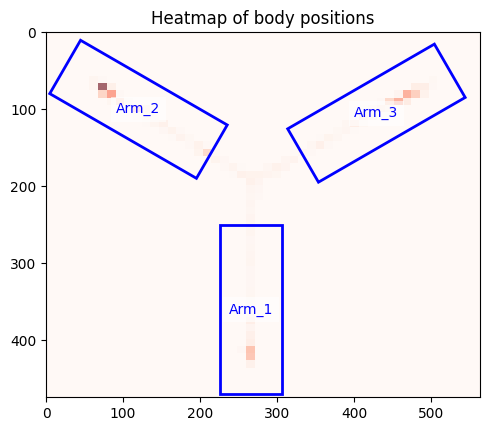

In [135]:
plot_bodypart_heatmap(params, df_smooth)

In [136]:
def plot_time_spent(area_df, bodypart, fps=30):
    """
    Plots the time spent in each area for a specific body part.
    
    Parameters:
    - area_df: DataFrame containing the assigned areas for each body part.
    - bodypart: The body part to analyze (column name).
    - fps: Frames per second of the video (default: 30).
    """
    # Count occurrences of each area
    time_spent = area_df[bodypart].value_counts().sort_index()

    # Convert frame count to time (seconds)
    time_spent_seconds = time_spent / fps

    # Plot
    plt.figure(figsize=(8, 5))
    time_spent_seconds.plot(kind="bar", color="skyblue", edgecolor="black")
    plt.xlabel("Area")
    plt.ylabel("Time spent (s)")
    plt.title(f"Time spent in each area - {bodypart}")
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


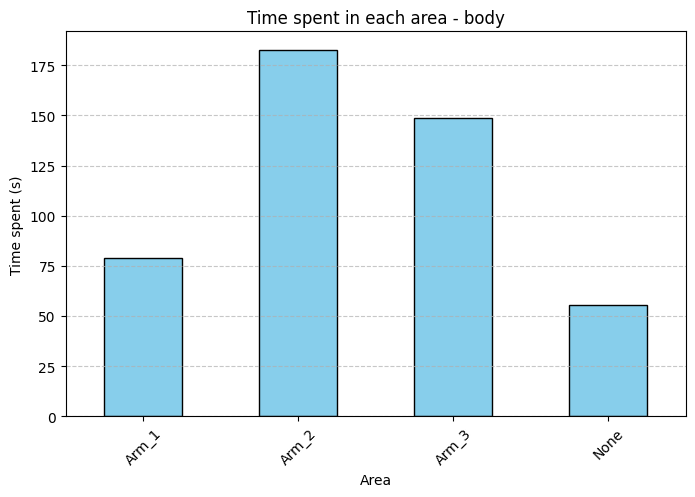

In [137]:
# Example usage:
plot_time_spent(areas_df, "body", fps=30)

---
#### (Optional, but recommended) If we want to scale our data from pixels to cm, we can use a measured distance between two points.
How do we choose which points to choose?
- Best case scenario, we use the same two points that we selected when we aligned the videos (e.g. two corners of the arena).
- If we didn't align the videos, we can use two points that are static throughout the experiment (e.g. two objects used as exploration targets).
- If we don't have two points that are static throughout the experiment, we can use two bodyparts that keep a constant distance from each other (e.g. the distance between both ears).

In [ ]:
scale = rst.find_scale_factor(params, df_smooth, print_results=True, plot_results=True)

median distance is 240.95850265139018, mean distance is 240.95850265139018. Scale factor is 0.1868 (1 cm = 5.35 px).
Distance between points is a single value. Skipping plot.


---
#### 6. Now that we know what we are doing, we can apply all previous steps to all the files in our folder and store the results into csv files (lets face it, they are less scary).

In [12]:
# Process every file in the folder
rst.process_position_files(params, scale = True)

2025_03-Y_Maze-R01_C1i_position.h5 has 30 columns. Mouse entered after 2.07 sec. Scale factor: 0.1868 (1 cm = 5.35 px). 
2025_03-Y_Maze-R02_C1d_position.h5 has 30 columns. Mouse entered after 2.30 sec. Scale factor: 0.1868 (1 cm = 5.35 px). 
2025_03-Y_Maze-R03_C1a_position.h5 has 30 columns. Mouse entered after 1.57 sec. Scale factor: 0.1868 (1 cm = 5.35 px). 
2025_03-Y_Maze-R04_C2i_position.h5 has 30 columns. Mouse entered after 1.50 sec. Scale factor: 0.1868 (1 cm = 5.35 px). 
2025_03-Y_Maze-R05_C2d_position.h5 has 30 columns. Mouse entered after 2.13 sec. Scale factor: 0.1868 (1 cm = 5.35 px). 
2025_03-Y_Maze-R06_C2a_position.h5 has 30 columns. Mouse entered after 1.77 sec. Scale factor: 0.1868 (1 cm = 5.35 px). 
2025_03-Y_Maze-R07_C3i_position.h5 has 30 columns. Mouse entered after 1.47 sec. Scale factor: 0.1868 (1 cm = 5.35 px). 
2025_03-Y_Maze-R08_C3d_position.h5 has 30 columns. Mouse entered after 0.90 sec. Scale factor: 0.1868 (1 cm = 5.35 px). 
2025_03-Y_Maze-R09_C3n_position.

---
#### 7. Finally, we can organize the files into subfolders corresponding to different trials of the experiment.

In [13]:
# Clean the folder
rst.filter_and_move_files(params)

Files filtered and moved successfully.
All .H5 files are stored away


---
---
#### Our experiment folder now has subfolders according to the number of trials, each containing csv files with mice position.
We can move on to the next notebook, 2-Geometric_analysis.ipynb

---
RAINSTORM - Created on Aug 27, 2023 - @author: Santiago D'hers
